In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import math

### Population Data

Collected from censusreporter.org - https://censusreporter.org/data/table/?table=B01003&geo_ids=16000US1714000,140|16000US1714000&primary_geo_id=16000US1714000

ASC 5-year 2021 B01003 Total Population

Note: to know what the column represent, please check on the metadata.json file in each folder

In [33]:
filename = 'Census Data/Census/acs2021_5yr_B01003_14000US17031250700/acs2021_5yr_B01003_14000US17031250700.shp'
pop_df = gpd.read_file(filename)

In [34]:
print(pop_df)

                  geoid                              name  B01003001  \
0    14000US17031010100        Census Tract 101, Cook, IL     4534.0   
1    14000US17031010201     Census Tract 102.01, Cook, IL     8232.0   
2    14000US17031010202     Census Tract 102.02, Cook, IL     3124.0   
3    14000US17031010300        Census Tract 103, Cook, IL     6085.0   
4    14000US17031010400        Census Tract 104, Cook, IL     4587.0   
..                  ...                               ...        ...   
797  14000US17031980000       Census Tract 9800, Cook, IL        0.0   
798  14000US17031980100       Census Tract 9801, Cook, IL        0.0   
799  14000US17043840000     Census Tract 8400, DuPage, IL     2898.0   
800  14000US17043840801  Census Tract 8408.01, DuPage, IL     2590.0   
801      16000US1714000                       Chicago, IL  2742119.0   

     B01003001e                                           geometry  
0         691.0  POLYGON ((-87.67720 42.02294, -87.67628 42.022...

In [35]:
boundary = pop_df[:800] # Delete Chicago,IL row

In [36]:
boundary.to_file('data/Boundaries - Census Tracts/chicago_boundary_tract.shp') 

### Total Household Data

Collected from censusreporter.org - https://censusreporter.org/data/table/?table=B11012&geo_ids=16000US1714000,140|16000US1714000&primary_geo_id=16000US1714000#valueType|estimate

ASC 5-year 2021 B11012: Households by Type

Note: to know what the column represent, please check on the metadata.json file in each folder

In [4]:
filename = 'Census Data/Census/acs2021_5yr_B11012_14000US17031250700/acs2021_5yr_B11012_14000US17031250700.shp'
hh_df = gpd.read_file(filename)

### Household Median Income Data

Collected from censusreporter.org - https://censusreporter.org/data/table/?table=B19013&geo_ids=16000US1714000,140|16000US1714000&primary_geo_id=16000US1714000

ASC 5-year 2021 B19013: Median Household Income

Note: to know what the column represent, please check on the metadata.json file in each folder

In [5]:
filename = 'Census Data/Census/acs2021_5yr_B19013_14000US17031250700/acs2021_5yr_B19013_14000US17031250700.shp'
hh_income_df = gpd.read_file(filename)
hh_income_df.head()

,geoid,name,B19013001,B19013001e,geometry
0,14000US17031010100,"Census Tract 101, Cook, IL",60316.0,24932.0,"POLYGON ((-87.67720 42.02294, -87.67628 42.022..."
1,14000US17031010201,"Census Tract 102.01, Cook, IL",43750.0,21149.0,"POLYGON ((-87.68465 42.01948, -87.68432 42.019..."
2,14000US17031010202,"Census Tract 102.02, Cook, IL",45096.0,5367.0,"POLYGON ((-87.67683 42.01941, -87.67674 42.019..."
3,14000US17031010300,"Census Tract 103, Cook, IL",60846.0,13337.0,"POLYGON ((-87.67133 42.01937, -87.67121 42.019..."
4,14000US17031010400,"Census Tract 104, Cook, IL",43024.0,8584.0,"POLYGON ((-87.66345 42.01283, -87.66321 42.012..."


### Household Size by Vehicles Available

Collected from censusreporter.org - https://censusreporter.org/data/table/?table=B08201&geo_ids=16000US1714000,140|16000US1714000&primary_geo_id=16000US1714000

ASC 5-year 2021 B08201: Household Size by Vehicles Available

Note: to know what the column represent, please check on the metadata.json file in each folder

In [6]:
filename = 'Census Data/Census/acs2021_5yr_B08201_14000US17031250700/acs2021_5yr_B08201_14000US17031250700.shp'
hh_vh_df = gpd.read_file(filename)

### Means of Transportation to Work

Collected from censusreporter.org - https://censusreporter.org/data/table/?table=B08301&geo_ids=16000US1714000,140|16000US1714000&primary_geo_id=16000US1714000

ASC 5-year 2021 B08301: Means of Transportation to Work

Note: to know what the column represent, please check on the metadata.json file in each folder

In [7]:
filename = 'Census Data/Census/acs2021_5yr_B08301_14000US17031250700/acs2021_5yr_B08301_14000US17031250700.shp'
transport_df = gpd.read_file(filename)

### Combine Census Data

In here, we only use the estimate. We ignore the error value

In [8]:
pop_df.columns

Index(['geoid', 'name', 'B01003001', 'B01003001e', 'geometry'], dtype='object')

In [9]:
pop_df = pop_df[['geoid', 'name', 'B01003001', 'geometry']]
pop_df.head()

,geoid,name,B01003001,geometry
0,14000US17031010100,"Census Tract 101, Cook, IL",4534.0,"POLYGON ((-87.67720 42.02294, -87.67628 42.022..."
1,14000US17031010201,"Census Tract 102.01, Cook, IL",8232.0,"POLYGON ((-87.68465 42.01948, -87.68432 42.019..."
2,14000US17031010202,"Census Tract 102.02, Cook, IL",3124.0,"POLYGON ((-87.67683 42.01941, -87.67674 42.019..."
3,14000US17031010300,"Census Tract 103, Cook, IL",6085.0,"POLYGON ((-87.67133 42.01937, -87.67121 42.019..."
4,14000US17031010400,"Census Tract 104, Cook, IL",4587.0,"POLYGON ((-87.66345 42.01283, -87.66321 42.012..."


In [10]:
hh_df.columns

Index(['geoid', 'name', 'B11012001', 'B11012001e', 'B11012002', 'B11012002e',
       'B11012003', 'B11012003e', 'B11012004', 'B11012004e', 'B11012005',
       'B11012005e', 'B11012006', 'B11012006e', 'B11012007', 'B11012007e',
       'B11012008', 'B11012008e', 'B11012009', 'B11012009e', 'B11012010',
       'B11012010e', 'B11012011', 'B11012011e', 'B11012012', 'B11012012e',
       'B11012013', 'B11012013e', 'B11012014', 'B11012014e', 'B11012015',
       'B11012015e', 'B11012016', 'B11012016e', 'B11012017', 'B11012017e',
       'geometry'],
      dtype='object')

In [11]:
hh_df = hh_df[['geoid', 'B11012001']]
hh_df.head()

,geoid,B11012001
0,14000US17031010100,2411.0
1,14000US17031010201,2996.0
2,14000US17031010202,1234.0
3,14000US17031010300,2995.0
4,14000US17031010400,2034.0


In [12]:
hh_income_df.columns

Index(['geoid', 'name', 'B19013001', 'B19013001e', 'geometry'], dtype='object')

In [13]:
hh_income_df = hh_income_df[['geoid', 'B19013001']]

In [14]:
hh_vh_df.columns

Index(['geoid', 'name', 'B08201001', 'B08201001e', 'B08201002', 'B08201002e',
       'B08201003', 'B08201003e', 'B08201004', 'B08201004e', 'B08201005',
       'B08201005e', 'B08201006', 'B08201006e', 'B08201007', 'B08201007e',
       'B08201008', 'B08201008e', 'B08201009', 'B08201009e', 'B08201010',
       'B08201010e', 'B08201011', 'B08201011e', 'B08201012', 'B08201012e',
       'B08201013', 'B08201013e', 'B08201014', 'B08201014e', 'B08201015',
       'B08201015e', 'B08201016', 'B08201016e', 'B08201017', 'B08201017e',
       'B08201018', 'B08201018e', 'B08201019', 'B08201019e', 'B08201020',
       'B08201020e', 'B08201021', 'B08201021e', 'B08201022', 'B08201022e',
       'B08201023', 'B08201023e', 'B08201024', 'B08201024e', 'B08201025',
       'B08201025e', 'B08201026', 'B08201026e', 'B08201027', 'B08201027e',
       'B08201028', 'B08201028e', 'B08201029', 'B08201029e', 'B08201030',
       'B08201030e', 'geometry'],
      dtype='object')

In [15]:
hh_vh_df= hh_vh_df[['geoid','B08201002', 'B08201003','B08201004','B08201005','B08201006']]

In [16]:
transport_df.columns

Index(['geoid', 'name', 'B08301001', 'B08301001e', 'B08301002', 'B08301002e',
       'B08301003', 'B08301003e', 'B08301004', 'B08301004e', 'B08301005',
       'B08301005e', 'B08301006', 'B08301006e', 'B08301007', 'B08301007e',
       'B08301008', 'B08301008e', 'B08301009', 'B08301009e', 'B08301010',
       'B08301010e', 'B08301011', 'B08301011e', 'B08301012', 'B08301012e',
       'B08301013', 'B08301013e', 'B08301014', 'B08301014e', 'B08301015',
       'B08301015e', 'B08301016', 'B08301016e', 'B08301017', 'B08301017e',
       'B08301018', 'B08301018e', 'B08301019', 'B08301019e', 'B08301020',
       'B08301020e', 'B08301021', 'B08301021e', 'geometry'],
      dtype='object')

In [17]:
transport_df = transport_df[['geoid','B08301002', 'B08301003', 'B08301004', 'B08301005','B08301006', 
                             'B08301007', 'B08301008', 'B08301009']]

In [18]:
### data merge

census_df = pop_df.merge(hh_df, on='geoid', how='left')
census_df = census_df.merge(hh_income_df, on='geoid', how='left')
census_df = census_df.merge(hh_vh_df, on='geoid', how='left')
census_df = census_df.merge(transport_df, on='geoid', how='left')

In [19]:
### Put Administrative Data

In [20]:
census_df['geoid']= census_df.geoid.str[7:]

In [21]:
census_df['STATEFP']=census_df.geoid.str[:2]
census_df['COUNTYFP']=census_df.geoid.str[2:5]
census_df['TRACTFP']=census_df.geoid.str[5:]

In [22]:
### Put zipcode
filename = 'data/Boundaries - Zip Codes/chicago_boundary_zip.shp'
zip_df = gpd.read_file(filename) 





In [23]:
census_df = census_df[:800] # Delete Chicago,IL row

In [24]:
census_df['B08201_avg']=np.ceil((0*census_df.B08201002+1*census_df.B08201003
                         +2*census_df.B08201004+3*census_df.B08201005+4*census_df.B08201006)/census_df.B11012001)
census_df['B08201_avg'] = census_df['B08201_avg'].fillna(0)

census_df['B08301_avg']=np.ceil((1*census_df.B08301003+2*census_df.B08301005+3*census_df.B08301006
                               +4*census_df.B08301007+5*census_df.B08301008
                               +7*census_df.B08301009)/census_df.B08301002)
census_df['B08301_avg'] = census_df['B08301_avg'].fillna(0)

In [25]:
census_df = census_df[['geoid','STATEFP','COUNTYFP','TRACTFP',
                       'B01003001', 'B11012001', 'B19013001','B08201002',
                       'B08201003', 'B08201004', 'B08201005', 'B08201006', 'B08301002',
                       'B08301003', 'B08301004', 'B08301005', 'B08301006', 'B08301007',
                       'B08301008', 'B08301009','B08201_avg','B08301_avg','geometry']]

In [26]:
census_df.columns = ['GEOID','STATEFP','COUNTYFP','TRACTFP',
                     'TotPop', 'TotHshld', 'MedHInc','HH0Veh',
                     'HH1Veh', 'HH2Veh', 'HH3Veh', 'HH4pVeh', 'WrkDrv',
                     'WrkAlone', 'Carpool', 'Carp2', 'Carp3', 'Carp4',
                     'Carp56', 'Carp7p','VehAvg','CarpAvg','geometry']

In [27]:
census_df

,GEOID,STATEFP,COUNTYFP,TRACTFP,TotPop,TotHshld,MedHInc,HH0Veh,HH1Veh,HH2Veh,...,WrkAlone,Carpool,Carp2,Carp3,Carp4,Carp56,Carp7p,VehAvg,CarpAvg,geometry
0,17031010100,17,031,010100,4534.0,2411.0,60316.0,1116.0,912.0,355.0,...,932.0,35.0,0.0,35.0,0.0,0.0,0.0,1.0,2.0,"POLYGON ((-87.67720 42.02294, -87.67628 42.022..."
1,17031010201,17,031,010201,8232.0,2996.0,43750.0,895.0,1510.0,496.0,...,1835.0,294.0,203.0,91.0,0.0,0.0,0.0,1.0,2.0,"POLYGON ((-87.68465 42.01948, -87.68432 42.019..."
2,17031010202,17,031,010202,3124.0,1234.0,45096.0,487.0,615.0,87.0,...,556.0,45.0,29.0,9.0,7.0,0.0,0.0,1.0,2.0,"POLYGON ((-87.67683 42.01941, -87.67674 42.019..."
3,17031010300,17,031,010300,6085.0,2995.0,60846.0,1108.0,1095.0,732.0,...,1722.0,203.0,170.0,15.0,18.0,0.0,0.0,1.0,2.0,"POLYGON ((-87.67133 42.01937, -87.67121 42.019..."
4,17031010400,17,031,010400,4587.0,2034.0,43024.0,989.0,878.0,150.0,...,740.0,49.0,10.0,0.0,0.0,39.0,0.0,1.0,2.0,"POLYGON ((-87.66345 42.01283, -87.66321 42.012..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,17031844600,17,031,844600,2490.0,809.0,67634.0,165.0,517.0,60.0,...,527.0,14.0,0.0,14.0,0.0,0.0,0.0,2.0,2.0,"POLYGON ((-87.62913 41.81645, -87.62893 41.816..."
796,17031844700,17,031,844700,1573.0,653.0,31898.0,189.0,289.0,140.0,...,296.0,85.0,77.0,8.0,0.0,0.0,0.0,2.0,2.0,"POLYGON ((-87.71989 41.85268, -87.71989 41.852..."
797,17031980000,17,031,980000,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-87.94025 42.00717, -87.94017 42.007..."
798,17031980100,17,031,980100,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-87.76230 41.79274, -87.76206 41.792..."


In [28]:
census_df.to_file('data/Census - Census Tracts/chicago_census data_tract.shp') 
census_df.to_csv('data/Census - Census Tracts/chicago_census data_tract.csv') 

census_df description
- GEOID: 11 digits FIPS code
- STATEFP: State code
- COUNTYFP: County code
- TRACTFP: Census tract code
- ZIPCODE: Postal Zipcode
- TotPop: total population
- TotHshld: total household
- MedHInc: household median income
- HH0Veh: household with 0 vehicle
- HH1Veh: household with 1 vehicle
- HH2Veh: household with 2 vehicle
- HH3Veh: household with 3 vehicles
- HH4pVeh: household with >4 vehicles
- WrkDrv: total worker drive to work
- WrkAlone: total worker drive alone to work
- Carpool: total worker drive in carpooled to work
- Carp2: total worker drive in carpooled 2 people to work
- Carp3: total worker drive in carpooled 3 people to work
- Carp4: total worker drive in carpooled 4 people to work
- Carp56: total worker drive in carpooled 5-6 people to work
- Carp7p: total worker drive in carpooled >7 people to work
- VehAvg: average total vehicle in a household
- CarpAvg: average people in car
- geometry: shape of census tract

In [29]:
filename = 'data/Census - Census Tracts/chicago_census data_tract.shp'
census_df = gpd.read_file(filename)

In [30]:
print(census_df)

           GEOID STATEFP COUNTYFP TRACTFP  TotPop  TotHshld  MedHInc  HH0Veh  \
0    17031010100      17      031  010100  4534.0    2411.0  60316.0  1116.0   
1    17031010201      17      031  010201  8232.0    2996.0  43750.0   895.0   
2    17031010202      17      031  010202  3124.0    1234.0  45096.0   487.0   
3    17031010300      17      031  010300  6085.0    2995.0  60846.0  1108.0   
4    17031010400      17      031  010400  4587.0    2034.0  43024.0   989.0   
..           ...     ...      ...     ...     ...       ...      ...     ...   
795  17031844600      17      031  844600  2490.0     809.0  67634.0   165.0   
796  17031844700      17      031  844700  1573.0     653.0  31898.0   189.0   
797  17031980000      17      031  980000     0.0       0.0      NaN     0.0   
798  17031980100      17      031  980100     0.0       0.0      NaN     0.0   
799  17043840000      17      043  840000  2898.0     937.0  67212.0    84.0   

     HH1Veh  HH2Veh  ...  WrkAlone  Car

<AxesSubplot:>

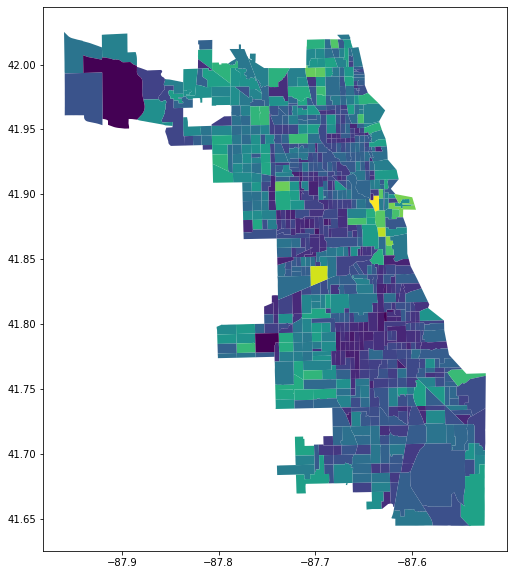

In [31]:
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams['figure.dpi'] = 100
census_df.plot(ax=ax, column = 'TotPop')  